In [2]:
## Import Python libraries ## 

import numpy as np
import xsimlab as xs
import matplotlib.pyplot as plt
import xarray as xr


%matplotlib inline
%reload_ext xsimlab.ipython


import fastscape

from orographic_precipitation.fastscape_ext import precip_model
from fastscape.processes import Bedrock


In [3]:
print('xarray-simlab version: ', xs.__version__)
print('fastscape version: ', fastscape.__version__)

xarray-simlab version:  0.5.0
fastscape version:  0.1.0


In [62]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (18 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
init_topography
    seed                   [in] random seed
surf2erode
diffusion
    diffusivity            [in] () or ('y', 'x') diffusivity (trans...
init_erosion
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    c

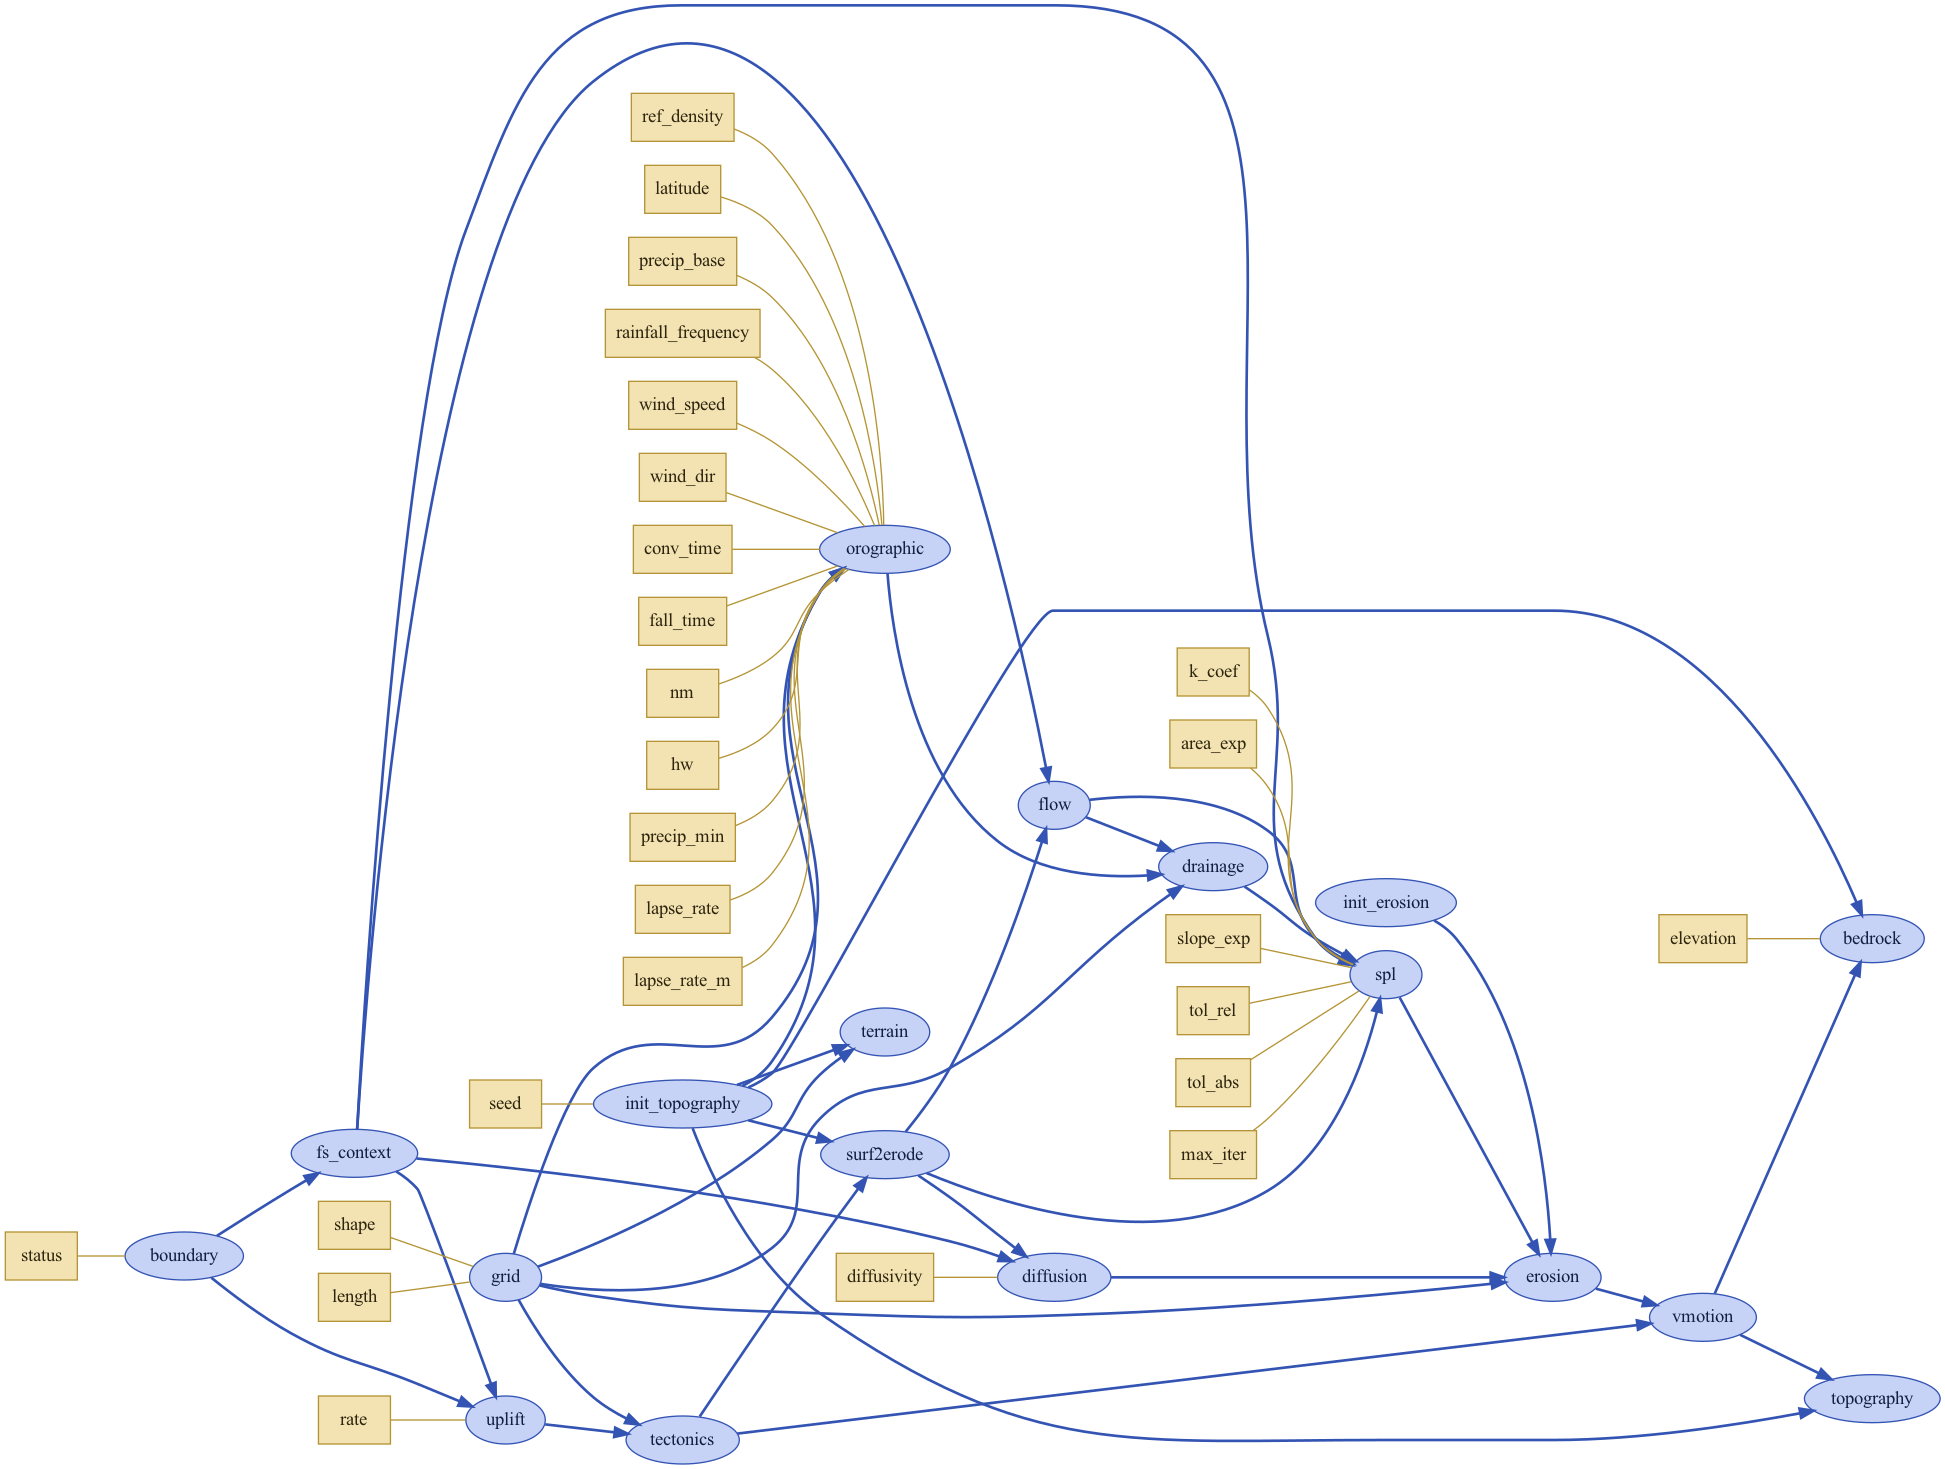

In [69]:
## Visualise xarray-simlab ##
SouthernAndesLEM.visualize(show_inputs='True')

In [63]:
## Model dimensions/grid dimensions ##
nx = 400
ny = 400
nn = nx * ny

xl = 400.e3
yl = 400.e3 

BoundaryCondition = ['looped', 'looped', 'fixed_value', 'fixed_value']

## Model time and time stepping ##
EndTime_1 = 5e6
EndTime_2 = 5e6
EndTime_3 = 8e6
TimeSteps_1 = 10001
TimeSteps_2 = 10001
TimeSteps_3 = 16001

# EndTime = 1e6
# TimeSteps = 1001
ModelTime_1 = np.linspace(0., EndTime_1, TimeSteps_1)
ModelTime_2 = np.linspace(0., EndTime_2, TimeSteps_2)
ModelTime_3 = np.linspace(0., EndTime_3, TimeSteps_3)

PlotStep = 100

## Tectonics ##
k_coef= 2.5e-5
area_exp = 0.4
slope_exp = 1.0
diffusion_diffusivity = 0.

## Background Precipitation ##
precip_base_arr = np.ones([20, 20])
precip_base_arr=precip_base_arr*5
xr_2d = xr.DataArray(np.ones((20,20)), dims=['y','x'])
precip_base_xr=xr_2d*5

## Orographic ##
lapse_rate = -5.8
lapse_rate_m = -6.5 
ref_density = 7.4e-3
rainfall_frequency = 150
latitude = 40
precip_base =  precip_base_xr
wind_speed = 3.5
wind_dir = 270
precip_min = 0.001
conv_time = 1000
fall_time = 1000
nm = 0.005
hw = 5000


## Initial topography ##
WhiteNoiseLevel = 50 # in [m], amplitude of noise

## Seed for Reproducibility ##
RandomSeed = 1410

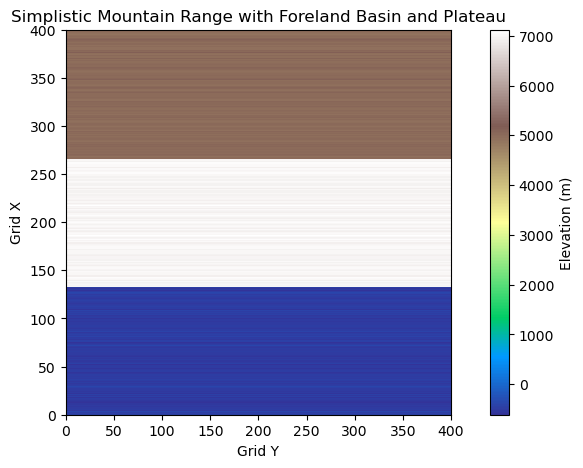

In [64]:
# Define elevation levels
ForelandBasinElevation = -500
MountainRangeElevation = 7000
PlateauElevation = 5000

# Create a synthetic topographic profile
x = np.linspace(0, nx - 1, nx)
TopographyProfile = np.zeros(nx)

# Define regions
ForelandBasinWidth = nx // 3
MountainRangeWidth = nx // 3
PlateauWidth = nx - ForelandBasinWidth - MountainRangeWidth

# Assign elevations to each region
TopographyProfile[:ForelandBasinWidth] = ForelandBasinElevation
TopographyProfile[ForelandBasinWidth:ForelandBasinWidth + MountainRangeWidth] = MountainRangeElevation
TopographyProfile[ForelandBasinWidth + MountainRangeWidth:] = PlateauElevation

# Add noise
np.random.seed(RandomSeed)
Noise = np.random.normal(0, WhiteNoiseLevel, nx)
TopographyProfile = TopographyProfile + Noise

# Expand the profile to a 2D grid
InitialTopography = np.tile(TopographyProfile, (ny, 1)).T

# Visualize the result
plt.figure(figsize=(10, 5))
plt.imshow(InitialTopography, cmap='terrain', origin='lower', extent=[0, ny, 0, nx])
plt.colorbar(label='Elevation (m)')
plt.title('Simplistic Mountain Range with Foreland Basin and Plateau')
plt.xlabel('Grid Y')
plt.ylabel('Grid X')
plt.show()


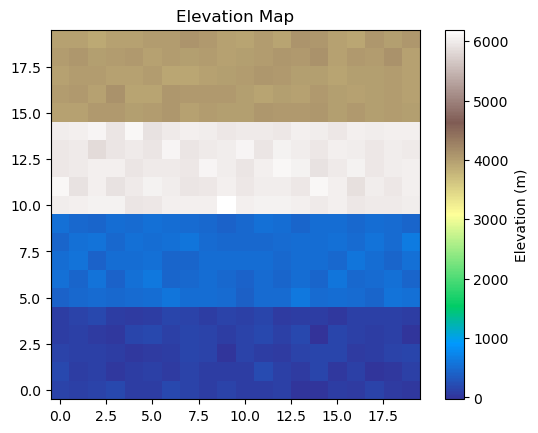

In [65]:
# Total number of nodes
nn = 400  # Example: 400 nodes
InitialTopography = np.zeros(nn)  # Initialize an array to store elevations

# Assign elevations based on node indices
for i in range(nn):
    if 0 <= i < 100:
        InitialTopography[i] = 100  # Elevation of 100 m for nodes 0-99
    elif 100 <= i < 200:
        InitialTopography[i] = 500  # Elevation of 500 m for nodes 100-199
    elif 200 <= i < 300:
        InitialTopography[i] = 6000  # Elevation of 6000 m for nodes 200-299
    elif 300 <= i < 400:
        InitialTopography[i] = 4000  # Elevation of 4000 m for nodes 300-399

# Assign elevations using slicing
InitialTopography[0:100] = 100    # Elevation of 100 m for nodes 0-99
InitialTopography[100:200] = 500  # Elevation of 500 m for nodes 100-199
InitialTopography[200:300] = 6000 # Elevation of 6000 m for nodes 200-299
InitialTopography[300:400] = 4000 # Elevation of 4000 m for nodes 300-399

# Assign elevations using slicing
InitialTopography[0:100] = 100    # Elevation of 100 m for nodes 0-99
InitialTopography[100:200] = 500  # Elevation of 500 m for nodes 100-199
InitialTopography[200:300] = 6000 # Elevation of 6000 m for nodes 200-299
InitialTopography[300:400] = 4000 # Elevation of 4000 m for nodes 300-399

# Adding random noise to the elevations
np.random.seed(42)  # For reproducibility
WhiteNoiseLevel = 50  # Standard deviation of noise

Noise = np.random.normal(0, WhiteNoiseLevel, nn)
InitialTopography += Noise  # Add noise to the elevations

# Reshape into a 2D grid for visualization
nx, ny = 20, 20  # Example: 20x20 grid
InitialTopography2D = InitialTopography.reshape(nx, ny)

# Plotting
import matplotlib.pyplot as plt
plt.imshow(InitialTopography2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.show()


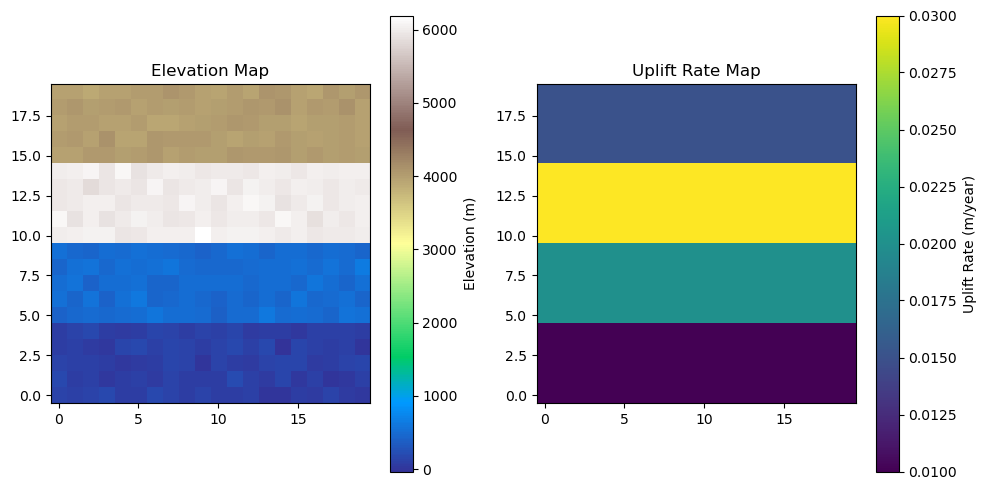

In [66]:
# Define first stage uplift rates for each region
UpliftRates = np.zeros(nn)  # Initialize uplift rates array
UpliftRates[0:100] = 0.01    # Uplift rate for nodes 0-99 (e.g., 0.01 m/year)
UpliftRates[100:200] = 0.02  # Uplift rate for nodes 100-199 (e.g., 0.02 m/year)
UpliftRates[200:300] = 0.03  # Uplift rate for nodes 200-299 (e.g., 0.03 m/year)
UpliftRates[300:400] = 0.015 # Uplift rate for nodes 300-399 (e.g., 0.015 m/year)

# Reshape into a 2D grid for visualization
nx, ny = 20, 20  # Example: 20x20 grid
InitialTopography2D = InitialTopography.reshape(nx, ny)
UpliftRates2D = UpliftRates.reshape(nx, ny)

# Plotting the elevation map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(InitialTopography2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')

# Plotting the uplift rate map
plt.subplot(1, 2, 2)
plt.imshow(UpliftRates2D, cmap='viridis', origin='lower')
plt.colorbar(label='Uplift Rate (m/year)')
plt.title('Uplift Rate Map')

plt.tight_layout()
plt.show()